In [85]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame,TimeSeriesPredictor
import matplotlib.pyplot as plt

def load_and_predict(start_date, periods, freq='D', item_id='Y08'):
    # 모델 로드
    predictor = TimeSeriesPredictor.load(r'AutogluonModels\ag-20240711_112932')
    
    # 예측할 데이터 준비
    data = {
        "item_id": [item_id] * periods,
        "timestamp": pd.date_range(start=start_date, periods=periods, freq=freq),
        "amt": [0] * periods  # 실제 값은 필요 없음, 예측을 위한 구조만 필요
    }

    # DataFrame으로 변환
    df = pd.DataFrame(data)
    df = TimeSeriesDataFrame.from_data_frame(
        df,
        id_column="item_id",
        timestamp_column="timestamp"
    )
    # 예측 수행
    predictions = predictor.predict(df)
    # timestamp와 mean만 추출
    predictions = predictions.loc[item_id, ['mean']].reset_index()
    # predictor.plot(df, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)
    return predictions

def plot_predictions(predictions, start_date, periods, freq='D', item_id='Y08'):
    # 예측 결과에서 단일 아이템 선택
    pred_item = predictions.loc[item_id]

    # 예측 결과를 그래프로 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(pd.date_range(start=start_date, periods=periods, freq=freq), pred_item.values, label='Predictions', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(f'Predictions over Time for Item {item_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 모델 경로와 예측할 기간 설정
model_path = 'models/merged_data_gm'  # 실제 모델 경로로 변경
start_date = '2024-06-01'
periods = 28

# 예측 수행
predictions = load_and_predict(start_date, periods)
print(predictions)

# 예측 결과를 그래프로 시각화
# plot_predictions(predictions, start_date, periods)


    timestamp      mean
0  2024-06-29 -0.000030
1  2024-06-30  0.000038
2  2024-07-01 -0.000023
3  2024-07-02  0.000025
4  2024-07-03  0.000071
5  2024-07-04  0.000043
6  2024-07-05 -0.000005
7  2024-07-06 -0.000024
8  2024-07-07  0.000014
9  2024-07-08  0.000041
10 2024-07-09 -0.000017
11 2024-07-10 -0.000040
12 2024-07-11 -0.000055
13 2024-07-12 -0.000053
14 2024-07-13 -0.000063
15 2024-07-14 -0.000037
16 2024-07-15  0.000005
17 2024-07-16  0.000003
18 2024-07-17  0.000039
19 2024-07-18  0.000040
20 2024-07-19  0.000043
21 2024-07-20 -0.000033
22 2024-07-21 -0.000063
23 2024-07-22 -0.000028
24 2024-07-23 -0.000027
25 2024-07-24 -0.000033
26 2024-07-25 -0.000037
27 2024-07-26 -0.000019


In [86]:
def plot_predictions(predictions):
    # 예측 결과를 그래프로 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['timestamp'], predictions['mean'], label='Predictions', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title('Predictions over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

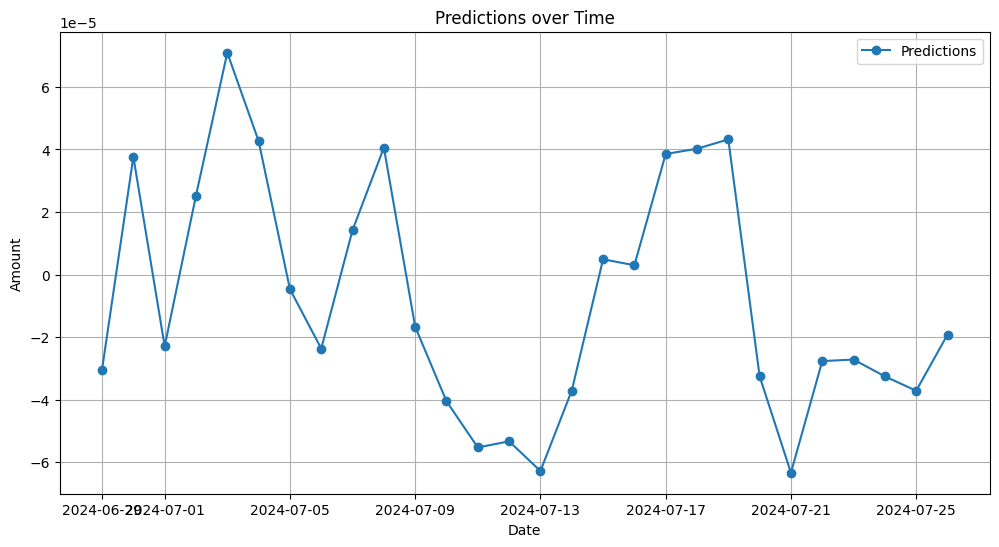

In [87]:
plot_predictions(predictions)

In [76]:
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)

NameError: name 'predictor' is not defined

In [88]:
predictor = TimeSeriesPredictor.load(r'AutogluonModels\ag-20240711_112932')

In [89]:
data = {
        "item_id": ['D05'] * periods,
        "timestamp": pd.date_range(start='2024-07-01', periods=28, freq='D'),
        "amt": [0] * periods  # 실제 값은 필요 없음, 예측을 위한 구조만 필요
}

In [91]:
df = pd.DataFrame(data)
df = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)

In [94]:
predictions = predictor.predict(df)
predictions.head()

mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                      
D05     2024-07-29  0.000061 -0.000562 -0.000355 -0.000273 -0.000154   
        2024-07-30  0.000080 -0.000549 -0.000364 -0.000225 -0.000121   
        2024-07-31  0.000060 -0.000545 -0.000382 -0.000227 -0.000123   
        2024-08-01  0.000101 -0.000237 -0.000172 -0.000128  0.000009   
        2024-08-02  0.000037 -0.000230 -0.000174 -0.000131 -0.000039   

                         0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                     
D05     2024-07-29  0.000061  0.000093  0.000267  0.000433  0.001059  
        2024-07-30  0.000080  0.000162  0.000352  0.000507  0.001126  
        2024-07-31  0.000060  0.000155  0.000361  0.000497  0.001101  
        2024-08-01  0.000101  0.000072  0.000145  0.000136  0.000406  
        2024-08-02  0.000037  0.000056  0.000063  0.000157  0.000460